# Visualization - Points, Edges, and Meshes
In this notebook, we provide a couple of examples to show how to visualize different types of objects using matplotlib and pyrender.


In [1]:
import sys,os

RES_PATH = '../../../../resources'
LIB_PATH = '../../../../python_lib'

if not os.path.exists(RES_PATH):
    print( 'cannot find \COMPM080-Tutorials-2020\resources\, please update RES_PATH')
    exit(1)
else:
    print('found resources')

# append path 
sys.path.append(LIB_PATH) 
from geo_tools import rd_helper

import pyglet
pyglet.options['shadow_window'] = False

import pyrender
import numpy as np
import trimesh

import matplotlib
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

found resources


## Create a point cloud 

In [2]:
mesh_fp = os.path.join(RES_PATH,'torus.obj')
assert os.path.exists(mesh_fp), 'cannot found:'+mesh_fp 
mm = trimesh.load(mesh_fp) 

surface_points = mm.sample(3000)
print(surface_points.shape)


(3000, 3)


## Use PLT plot to show points

D:\anaconda\envs\geo_tutorials\lib\site-packages\matplotlib\collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


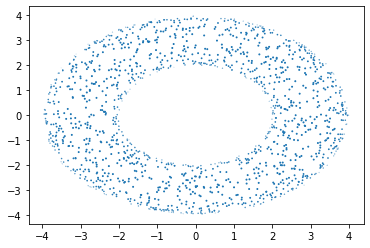

In [3]:
plt.scatter(surface_points[:,0],surface_points[:,1],surface_points[:,2])

## Convert points to a render object

In [4]:
pcd_rdobj = pyrender.Mesh.from_points(surface_points, colors=(0.0,1.0,0.0)) 


## Add a render object into the scene and display

In [5]:
def scene_factory(rdobj):
    scene = pyrender.Scene(ambient_light=0.5*np.array([1.0, 1.0, 1.0, 1.0]))
    pcd_nd = scene.add(rdobj)
    
    return scene


## Display - Viewer
![](../imgs/pcd_viewer.JPG) 

In [6]:
def run_gui(rdobj):
    scene = scene_factory(rdobj)
    v=pyrender.Viewer(scene, use_raymond_lighting=True)
    del v
    
run_gui(pcd_rdobj)

## Display -  OffscreenRender

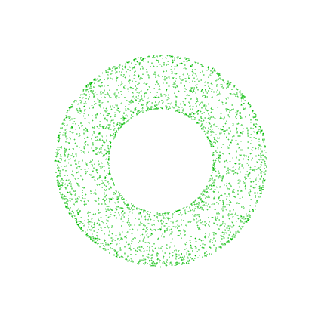

In [7]:
def run_offline(rdobj):   
    
    camera = pyrender.PerspectiveCamera(yfov=np.pi / 3.0, aspectRatio=1.0) 
    camera_pose = np.eye(4)
    camera_pose[2,2]=-1
    camera_pose[:3,3] = np.array((0.0, 0.0,-10))
    
    scene = scene_factory(rdobj)
    scene.add(camera, pose=camera_pose)
    
    r = pyrender.OffscreenRenderer(viewport_width=400, viewport_height=400)
    color, depth = r.render(scene)
    r.delete()

    plt.figure(dpi=100)
    plt.imshow(color) 
    plt.axis('off')

run_offline(pcd_rdobj)

# Create a Edge render object using our helper function

A edge segment is defined as (p0,p1), where p0 and p1 are N-by-3 matrix.  
`rd_helper.create_edges(p0,p1,p0_color,p1_color,line_color)`


In [8]:
np.random.seed(0)

p0 = np.random.rand(100,3)*2-1
p0 = p0 / np.linalg.norm(p0,axis=0)

p1 = np.zeros_like(p0)

edge_rdobj = rd_helper.create_edges(p0,p1, line_color=(1.0,0.0,0.0))


## Display - Viewer

In [9]:
def run_gui_edges(edge_rdobj):
    scene = scene_factory(edge_rdobj) 
    v=pyrender.Viewer(scene, use_raymond_lighting=True)
    
run_gui_edges(edge_rdobj)


## Display - OffscreenRenderer

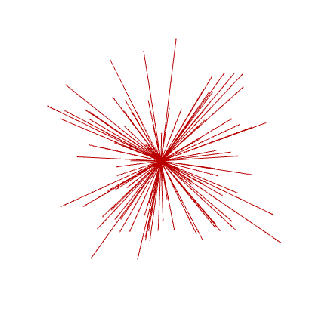

In [10]:
def run_offline_edges(edge_rdobj):   
    camera = pyrender.PerspectiveCamera(yfov=np.pi / 3.0, aspectRatio=1.0) 
    camera_pose = np.eye(4)
    camera_pose[2,2]=-1
    camera_pose[:3,3] = np.array((0.0, 0.0,-0.5))
    
    scene = scene_factory(edge_rdobj) 
    scene.add(camera, pose=camera_pose)
    
    r = pyrender.OffscreenRenderer(viewport_width=400, viewport_height=400)
    color, depth = r.render(scene)
    r.delete()

    plt.figure(dpi=100)
    plt.imshow(color) 
    plt.axis('off')

run_offline_edges(edge_rdobj)

## Create a Mesh render object from Trimesh.Mesh

In [11]:
mesh_fp = os.path.join(RES_PATH,'torus.obj')
assert os.path.exists(mesh_fp), 'cannot found:'+mesh_fp 
tm = trimesh.load(mesh_fp) 

print('tm.type=',type(tm))

mesh_rd = pyrender.Mesh.from_trimesh(tm)

print('mesh.type=',type(mesh_rd))

tm.type= <class 'trimesh.base.Trimesh'>
mesh.type= <class 'pyrender.mesh.Mesh'>


## Add the mesh to scene and display

In [12]:
def run_gui_mesh(rdobj):
    scene = scene_factory(rdobj)
    v=pyrender.Viewer(scene, use_raymond_lighting=True)
    del v
    
run_gui(mesh_rd)


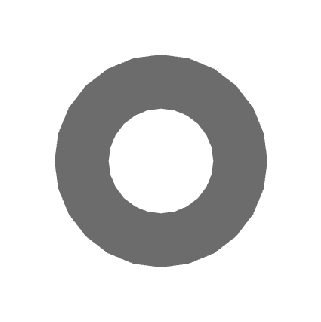

In [13]:
def run_offline(mesh_rd):   
    camera = pyrender.PerspectiveCamera(yfov=np.pi / 3.0, aspectRatio=1.0) 
    camera_pose = np.eye(4)
    camera_pose[2,2]=-1
    camera_pose[:3,3] = np.array((0.0, 0.0,-10))
    
    scene = scene_factory(mesh_rd)
    scene.add(camera, pose=camera_pose)
    
    r = pyrender.OffscreenRenderer(viewport_width=400, viewport_height=400)
    color, depth = r.render(scene)
    r.delete()

    plt.figure(dpi=100)
    plt.imshow(color) 
    plt.axis('off')

run_offline(mesh_rd)

## Change mesh's vertice colors

In [14]:
mesh_fp = os.path.join(RES_PATH,'torus.obj')
assert os.path.exists(mesh_fp), 'cannot found:'+mesh_fp 
tm = trimesh.load(mesh_fp) 

# flat color
#tm.visual.vertex_colors=(0.0,0.5,0.5)

num = tm.vertices.shape[0]
tm.visual.vertex_colors=np.random.rand(num,3)

In [15]:
if mesh_rd is not None:
    del mesh_rd
mesh_rd = pyrender.Mesh.from_trimesh(tm)


## Display
![](../imgs/mesh_viewer.JPG)

In [16]:
run_gui_mesh(mesh_rd)


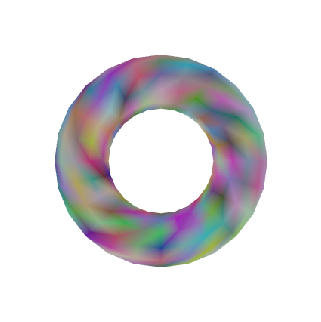

In [17]:
def run_offline(rdobj):   
    camera = pyrender.PerspectiveCamera(yfov=np.pi / 3.0, aspectRatio=1.0) 
    camera_pose = np.eye(4)
    camera_pose[2,2]=-1
    camera_pose[:3,3] = np.array((0.0, 0.0,-10))
    
    scene = scene_factory(rdobj)
    scene.add(camera, pose=camera_pose)
    
    r = pyrender.OffscreenRenderer(viewport_width=400, viewport_height=400)
    color, depth = r.render(scene)
    r.delete()

    plt.figure(dpi=100)
    plt.imshow(color) 
    plt.axis('off')

run_offline(mesh_rd)